In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster


In [16]:
tab_final=pd.read_csv('C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/tab_final.csv',";")
tab_final=tab_final.set_index("nom")
tab_final

C:\Users\Paul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,% Voix/Ins_T2,% Voix/Exp_T2,% Voix/Exp_T1,% Voix/Ins_T1,P13_pop,P13_pop0002,P13_pop0305,P13_pop0610,P13_pop1117,P13_pop1824,...,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI
nom,,,,,,,,,,,,,,,,,,,,,
Xavier Breton,21.25,53.75,26.78,12.93,115682.800721,2.484397,3.828599,6.533428,9.086115,7.324389,...,0,0,0,1,0,0,0,0,0,0
Olga Givernet,21.91,61.86,45.30,20.37,131843.000000,2.904212,4.470469,7.318553,9.396024,6.206625,...,0,0,0,0,1,0,0,0,0,0
Stéphane Trompille,25.21,64.50,36.00,17.33,126379.199279,2.446609,3.752997,6.853987,9.922535,7.430823,...,0,0,0,0,1,0,0,0,0,0
Damien Abad,25.74,67.02,35.00,16.91,115832.000000,2.676290,4.108537,7.059362,9.157228,6.897058,...,0,0,0,1,0,0,0,0,0,0
Aude Bono-Vandorme,23.06,56.22,28.79,13.88,105282.000000,2.629154,3.841149,6.741007,9.092809,7.563568,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
David Corceiro,19.86,57.11,1.10,0.49,117824.000000,2.827971,4.130772,6.643864,8.886211,8.721557,...,0,0,0,0,0,0,1,0,0,0
Dominique Da Silva,18.40,53.88,NaN,NaN,116638.876433,3.044462,4.439377,7.726470,10.200792,9.526055,...,0,0,0,0,1,0,0,0,0,0
François Pupponi,18.79,65.80,0.00,0.00,111720.123567,3.537415,5.429646,8.368242,10.725027,10.486932,...,0,0,0,0,0,0,1,0,0,0


In [19]:
tab_final=tab_final.drop(columns=['% Voix/Exp_T1','% Voix/Ins_T1'])

# Clustering

## Méthodes centroïdes

In [20]:
data_kmeans=tab_final

#### Méthode du coude

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


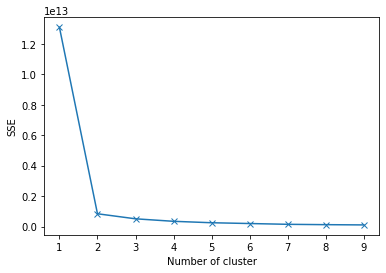

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_kmeans)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='x')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [22]:
#On fait 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(data_kmeans)
data_kmeans['groupe_kmeans']=kmeans.labels_
data_kmeans[data_kmeans['groupe_kmeans']==0].index.to_list()

['Xavier Breton',
 'Olga Givernet',
 'Stéphane Trompille',
 'Damien Abad',
 'Aude Bono-Vandorme',
 'Julien Dive',
 'Jean-Louis Bricout',
 'Marc Delatte',
 'Jacques Krabal',
 'Jean-Paul Dufrègne',
 'Laurence Vanceunebrock',
 'Bénédicte Peyrol',
 'Delphine Bagarry',
 'Pascale Boyer',
 'Claire Bouchet',
 'Loïc Dombreval',
 'Cédric Roussel',
 'Alexandra Valetta Ardisson',
 'Marine Brenier',
 'Laurence Trastour-Isnart',
 'Éric Pauget',
 'Bernard Brochand',
 'Michèle Tabarot',
 'Hervé Saulignac',
 'Michèle Victory',
 'Fabrice Brun',
 'Bérengère Poletti',
 'Pierre Cordier',
 'Jean-Luc Warsmann',
 'Bénédicte Taurine',
 'Michel Larive',
 'Grégory Besson-Moreau',
 'Valérie Bazin-Malgras',
 'Gérard Menuel',
 'Danièle Hérin',
 'Alain Perea',
 'Mireille Robert',
 'Stéphane Mazars',
 'Anne Blanc',
 'Julien Ravier',
 'Claire Pitollat',
 'Alexandra Louis',
 'Cathy Racon-Bouzon',
 'Guy Teissier',
 'Saïd Ahamada',
 'Jean-Marc Zulesi',
 'Bernard Deflesselles',
 'François-Michel Lambert',
 'Mohamed Laqhil

In [23]:
data_kmeans[data_kmeans['groupe_kmeans']==1].index.to_list()

['Jean-Luc Mélenchon', 'Marine Le Pen']

In [24]:
data_kmeans[data_kmeans['groupe_kmeans']==2].index.to_list()

['Christophe Castaner',
 'Éric Ciotti',
 'Richard Ferrand',
 'Adrien Quatennens',
 'Martine Wonner',
 'Mounir Mahjoubi',
 'François Ruffin',
 'Cédric Villani',
 'Nicolas Dupont-Aignan',
 'Jean-Christophe Lagarde',
 'Alexis Corbière',
 'Clémentine Autain']

## Méthodes hiérarchiques

In [25]:
data_CAH=tab_final
data_CAH

,% Voix/Ins_T2,% Voix/Exp_T2,P13_pop,P13_pop0002,P13_pop0305,P13_pop0610,P13_pop1117,P13_pop1824,P13_pop2539,P13_pop4054,...,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI,groupe_kmeans
nom,,,,,,,,,,,,,,,,,,,,,
Xavier Breton,21.25,53.75,115682.800721,2.484397,3.828599,6.533428,9.086115,7.324389,17.261977,20.751716,...,0,0,1,0,0,0,0,0,0,0
Olga Givernet,21.91,61.86,131843.000000,2.904212,4.470469,7.318553,9.396024,6.206625,21.676540,22.775574,...,0,0,0,1,0,0,0,0,0,0
Stéphane Trompille,25.21,64.50,126379.199279,2.446609,3.752997,6.853987,9.922535,7.430823,17.219633,21.975961,...,0,0,0,1,0,0,0,0,0,0
Damien Abad,25.74,67.02,115832.000000,2.676290,4.108537,7.059362,9.157228,6.897058,18.093446,21.467297,...,0,0,1,0,0,0,0,0,0,0
Aude Bono-Vandorme,23.06,56.22,105282.000000,2.629154,3.841149,6.741007,9.092809,7.563568,18.245457,20.526021,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
David Corceiro,19.86,57.11,117824.000000,2.827971,4.130772,6.643864,8.886211,8.721557,19.946021,21.113025,...,0,0,0,0,0,1,0,0,0,0
Dominique Da Silva,18.40,53.88,116638.876433,3.044462,4.439377,7.726470,10.200792,9.526055,19.452494,20.523329,...,0,0,0,1,0,0,0,0,0,0
François Pupponi,18.79,65.80,111720.123567,3.537415,5.429646,8.368242,10.725027,10.486932,20.995346,19.202470,...,0,0,0,0,0,1,0,0,0,0


In [15]:
#http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/Python/cah_kmeans_avec_python.pdf

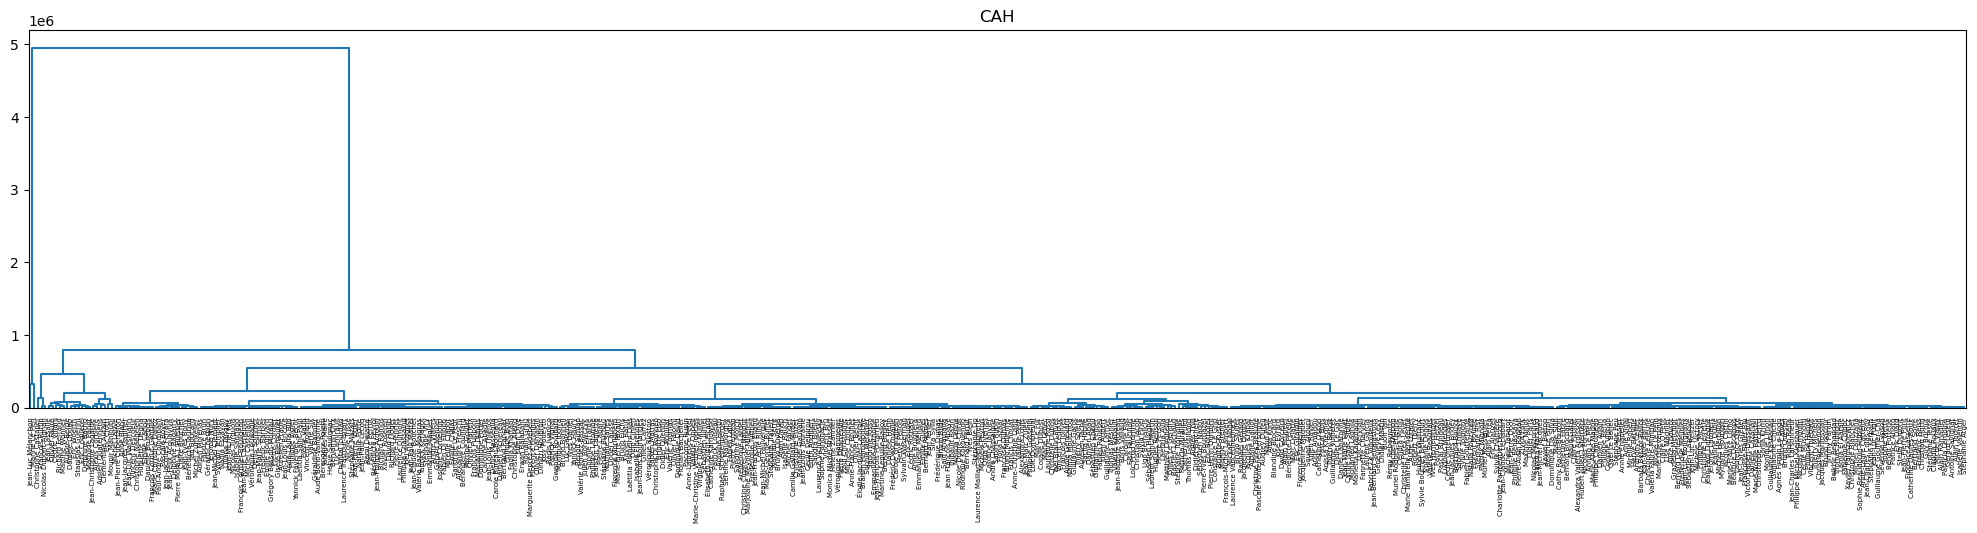

In [51]:
plt.figure(figsize=(25,5),dpi=100)
#générer la matrice des liens
Z = linkage(data_CAH,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(Z,labels=data_CAH.index,color_threshold=0)
plt.show()


In [60]:
#découpage à la hauteur t = 0.4
groupes_cah = fcluster(Z,t=0.4e6,criterion='distance')
#affichage des observations et leurs groupes
data_CAH['Groupe']=groupes_cah
data_CAH['Groupe'].nunique() #Nombre de groupes

5

In [61]:
data_CAH[data_CAH['Groupe']==1].index.to_list()

['Jean-Luc Mélenchon', 'Marine Le Pen']

In [62]:
data_CAH[data_CAH['Groupe']==2].index.to_list()

['Christophe Castaner', 'François Ruffin', 'Nicolas Dupont-Aignan']

In [63]:
data_CAH[data_CAH['Groupe']==3].index.to_list()

['Éric Ciotti',
 'Richard Ferrand',
 'Adrien Quatennens',
 'Éric Woerth',
 'Jean Lassalle',
 'Martine Wonner',
 'Stanislas Guerini',
 'Mounir Mahjoubi',
 'Danièle Obono',
 'Olivier Faure',
 'Aurore Bergé',
 'Delphine Batho',
 'Cédric Villani',
 'Éric Coquerel',
 'Jean-Christophe Lagarde',
 'Alexis Corbière',
 'Clémentine Autain',
 'Mathilde Panot']

In [64]:
data_CAH[data_CAH['Groupe']==4].index.to_list()

['Aude Bono-Vandorme',
 'Julien Dive',
 'Jean-Louis Bricout',
 'Bénédicte Peyrol',
 'Delphine Bagarry',
 'Pascale Boyer',
 'Claire Bouchet',
 'Laurence Trastour-Isnart',
 'Hervé Saulignac',
 'Fabrice Brun',
 'Bérengère Poletti',
 'Pierre Cordier',
 'Jean-Luc Warsmann',
 'Bénédicte Taurine',
 'Michel Larive',
 'Grégory Besson-Moreau',
 'Valérie Bazin-Malgras',
 'Gérard Menuel',
 'Stéphane Mazars',
 'Anne Blanc',
 'Laurence Dumont',
 'Nathalie Porte',
 'Vincent Descoeur',
 'Jean-Yves Bony',
 'Jean-Philippe Ardouin',
 'François Cormier-Bouligeon',
 'Nadia Essayan',
 'Jean-Jacques Ferrara',
 'Paul-André Colombani',
 'Michel Castellani',
 'Jean-Félix Acquaviva',
 'Rémi Delatte',
 'Fadila Khattabi',
 'Yannick Kerlogot',
 'Philippe Chassaing',
 'Jean-Pierre Cubertafon',
 'Denis Sommer',
 'Frédéric Barbier',
 'Mireille Clapot',
 'Olivier Marleix',
 'Luc Lamirault',
 'Philippe Vigier',
 'Sandrine Le Feur',
 'Liliana Tanguy',
 'Erwan Balanant',
 'Joël Aviragnet',
 'Jean-René Cazeneuve',
 'Gisèle

In [65]:
data_CAH[data_CAH['Groupe']==5].index.to_list()

['Xavier Breton',
 'Olga Givernet',
 'Stéphane Trompille',
 'Damien Abad',
 'Marc Delatte',
 'Jacques Krabal',
 'Jean-Paul Dufrègne',
 'Laurence Vanceunebrock',
 'Loïc Dombreval',
 'Cédric Roussel',
 'Alexandra Valetta Ardisson',
 'Marine Brenier',
 'Éric Pauget',
 'Bernard Brochand',
 'Michèle Tabarot',
 'Michèle Victory',
 'Danièle Hérin',
 'Alain Perea',
 'Mireille Robert',
 'Julien Ravier',
 'Claire Pitollat',
 'Alexandra Louis',
 'Cathy Racon-Bouzon',
 'Guy Teissier',
 'Saïd Ahamada',
 'Jean-Marc Zulesi',
 'Bernard Deflesselles',
 'François-Michel Lambert',
 'Mohamed Laqhila',
 'Éric Diard',
 'Pierre Dharréville',
 'Anne-Laurence Petel',
 'Bernard Reynès',
 'Monica Michel-Brassart',
 'Fabrice Le Vigoureux',
 'Christophe Blanchet',
 'Bertrand Bouyx',
 'Alain Tourret',
 'Thomas Mesnier',
 'Sandra Marsaud',
 'Jérôme Lambert',
 'Olivier Falorni',
 'Frédérique Tuffnell',
 'Raphaël Gérard',
 'Didier Quentin',
 'Loïc Kervran',
 'Christophe Jerretie',
 'Frédérique Meunier',
 'Didier Marti

## Méthodes à densité

In [114]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tab_final)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  0.223631 -0.387858
1 -0.690347 -0.207621
2 -0.001893 -0.146755
3  0.063649 -0.389398
4  0.105787 -0.415756


In [115]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 4).fit(X_principal)
labels = db_default.labels_
labels

array([-1, -1,  0,  1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  8, 10, -1, -1, -1,  9, -1,  2, 10,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1,  0, -1, -1, -1, -1,  8, -1,  9, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  2, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1, -1, -1, -1,
       -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        6, -1, -1, -1, -1

In [116]:
X_principal=labels
import plotly.express as px
plt.figure(figsize =(9, 9))
px.scatter(x=X_principal['P1'],y=X_principal['P2'])
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 648x648 with 0 Axes>

In [117]:
X_principal['P1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices